In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.utils import np_utils
from keras import datasets

In [ ]:
def DNN_ModelSequential(n_input, n_hidden, n_hidden2, n_out):
  model = Sequential()
  model.add(Dense(n_hidden, input_shape=(n_input,), activation='relu'))
  model.add(Dense(n_hidden2, activation='relu'))
  model.add(Dense(n_out, activation='softmax'))

  opt = Adam(lr=0.01)
  model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [8]:
label = ['Tshirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag','ankle_boot']

In [7]:
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


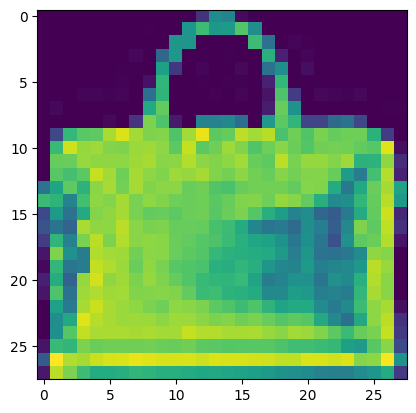

bag
[[  0   0   0   0   0   0   0   0   0   0   0   0  37 124 115   7   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0 134 175 136 139 187 125   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 133 133   0   0   0   0 175  95
    0   4   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   5   0  85 136   0   0   0   1   0   0 162
   23   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   1   0 145  41   0   3   0   0   5   0  95
  127   0   9   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0  12 168   0   0   1   0   1   1   0  23
  169   0   0   0   0   0   0   0   0   0]
 [  0   0   0   3   3   2   4   0  93 167   0   0   0   2   0   3   0  13
  185  45   0   5   4   2   5   0   0   0]
 [  0   5   0   0   0   0   0   0 156 194   0   0   0   0   0   0   0  19
  196 131   0   0   0   0   0   0   1   1]
 [  0   0   0   0   0   5   0  39 205 185  18   0 114 113 11

In [10]:
mySample = np.random.randint(60000)
plt.imshow(X_train[mySample])
plt.show()
print(label[Y_train[mySample]])
print(X_train[mySample])

In [ ]:
def Data_func():
  (X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()
  Y_train = np_utils.to_categorical(Y_train)
  Y_test = np_utils.to_categorical(Y_test)
  L, W, H = X_train.shape
  X_train = X_train.reshape(-1, W * H)
  X_test = X_test.reshape(-1, W * H)
  X_train = X_train / 255
  X_test = X_test / 255
  return (X_train, Y_train), (X_test, Y_test)

In [ ]:
model = DNN_ModelSequential(784, 128, 128, 10)
(x_train, y_train), (x_test, y_test) = Data_func()
print(model.summary())
print(x_train.shape, y_train.shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None
(60000, 784) (60000, 10)


In [ ]:
fit_hist = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.2)
performance_test = model.evaluate(x_test, y_test, batch_size=128)
print('test Loss Accurecy -> ',performance_test)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.5469 - accuracy: 0.8024 - val_loss: 0.4219 - val_accuracy: 0.8466
Epoch 2/50
375/375 [==============================] - 2s 4ms/step - loss: 0.4073 - accuracy: 0.8515 - val_loss: 0.4138 - val_accuracy: 0.8554
Epoch 3/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3789 - accuracy: 0.8610 - val_loss: 0.3957 - val_accuracy: 0.8591
Epoch 4/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3511 - accuracy: 0.8705 - val_loss: 0.3647 - val_accuracy: 0.8701
Epoch 5/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3439 - accuracy: 0.8720 - val_loss: 0.3691 - val_accuracy: 0.8679
Epoch 6/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3302 - accuracy: 0.8792 - val_loss: 0.3906 - val_accuracy: 0.8665
Epoch 7/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3205 - accuracy: 0.8818 - val_loss: 0.3498 - val_accuracy: 0.8760
Epoch 

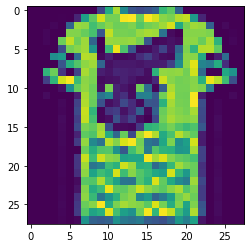

Tshirt
Tshirt


In [ ]:
mySample = np.random.randint(10000)
plt.imshow(X_test[mySample])
plt.show()
print(label[Y_test[mySample]])
pred = model.predict(x_test[mySample].reshape(-1,784))
print(label[np.argmax(pred)])

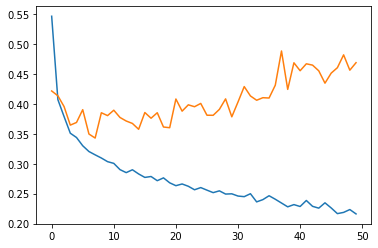

In [ ]:
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

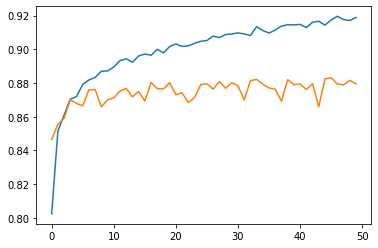

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()